In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()


df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 951
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 951
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values: 951
Percentage of abnormal values: 10.00%

TOTAL INCONSISTENCY PERCENTAGE
29.993692178301096

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precis

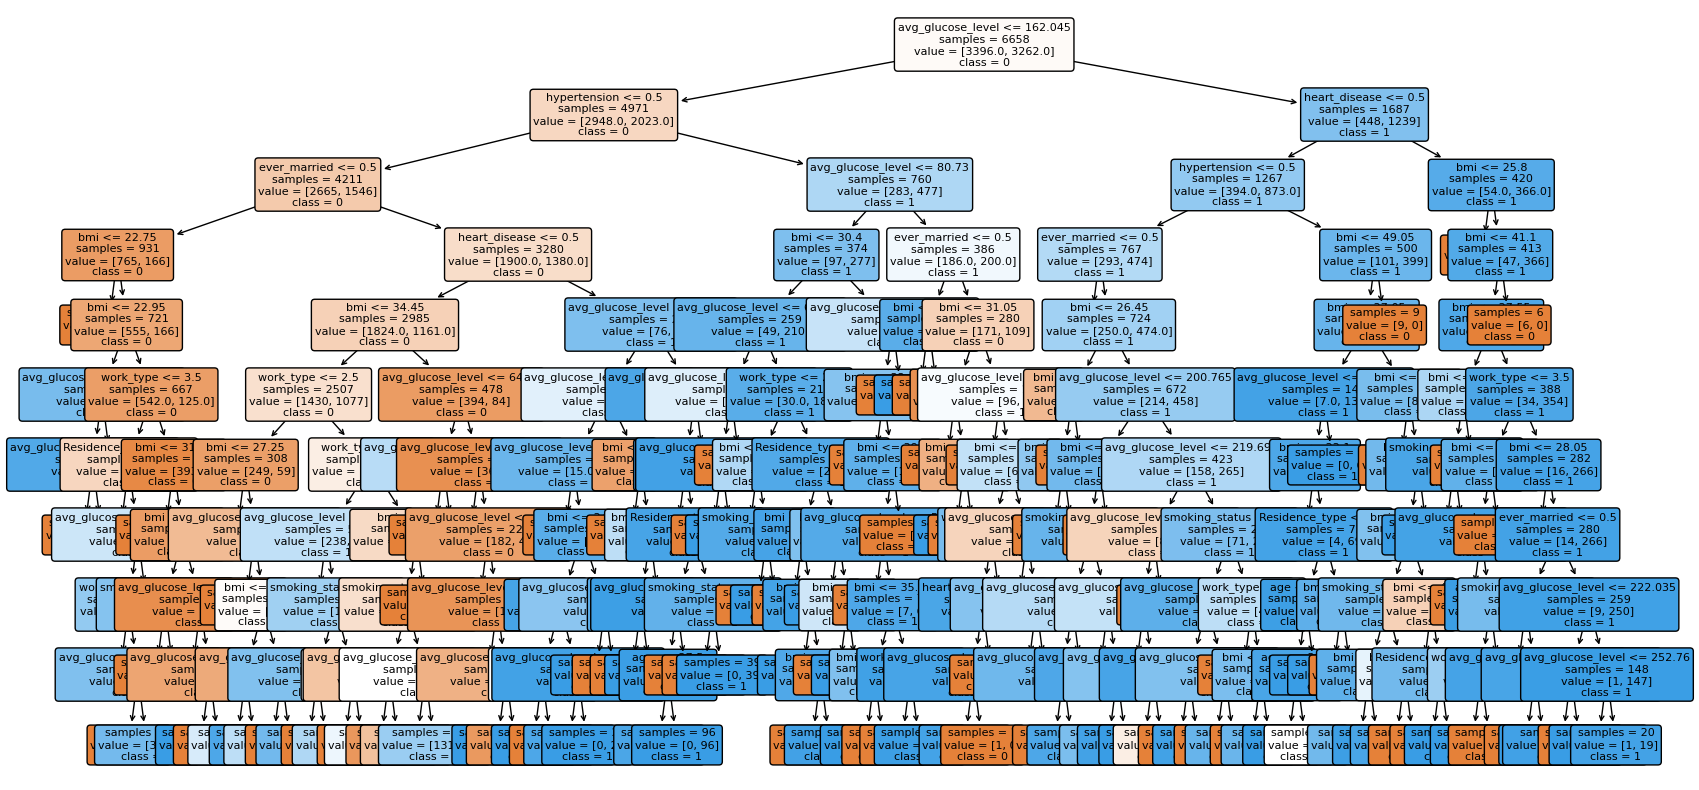

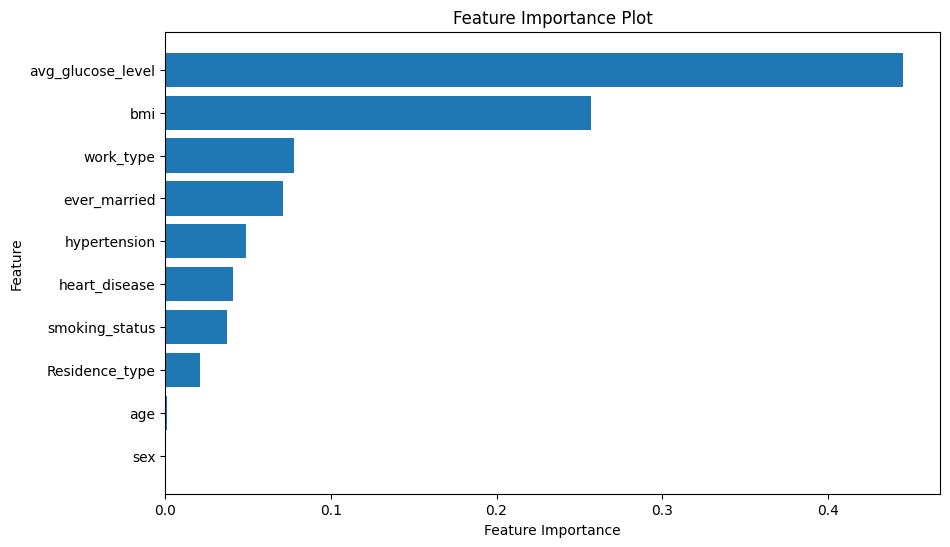

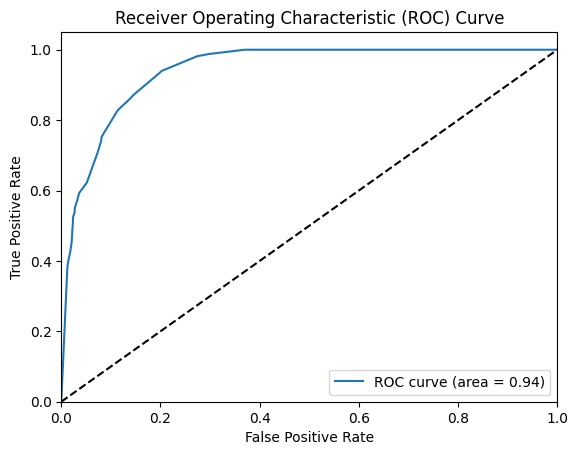

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9420153300398353
Accuracy for each fold: [0.8356643356643356, 0.7937062937062938, 0.8391608391608392, 0.8461538461538461, 0.8070175438596491, 0.8245614035087719, 0.8140350877192982, 0.8175438596491228, 0.8140350877192982, 0.7894736842105263]
Mean accuracy: 0.8181351981351982
95% confidence interval: (0.8047488748124613, 0.8315215214579351)


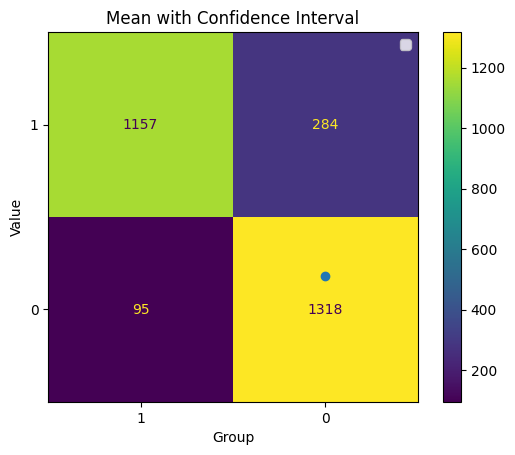


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



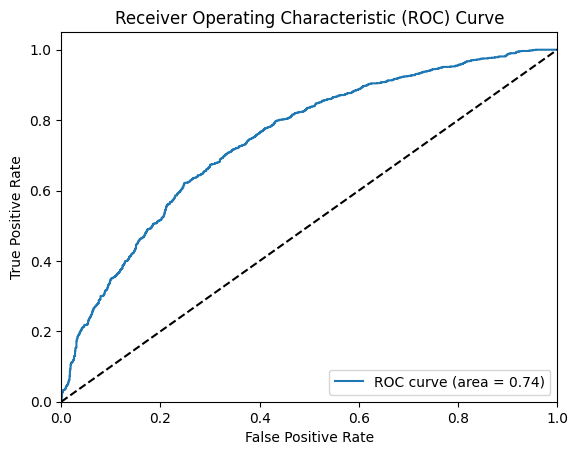

AUC Score: 0.7449041884788469


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6363636363636364, 0.6713286713286714, 0.6748251748251748, 0.7062937062937062, 0.6912280701754386, 0.6350877192982456, 0.6140350877192983, 0.631578947368421, 0.6912280701754386, 0.6385964912280702]
Mean accuracy: 0.6590565574776102
95% confidence interval: (0.6364467335946287, 0.6816663813605917)


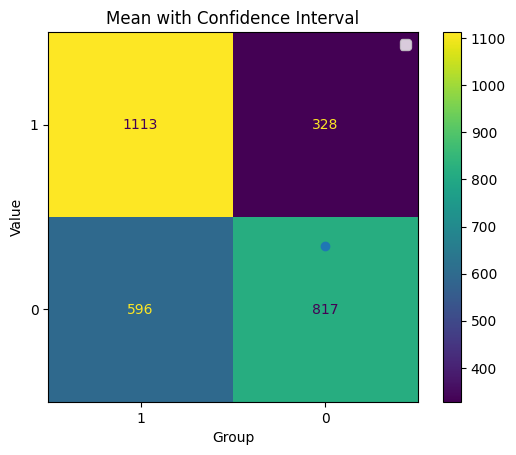


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 841
Percentage of inconsistencies in age and married features: 8.84%
Number of inconsistencies in age and workType features: 841
Percentage of inconsistencies in age and workType features: 8.84%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
17.682926829268293

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2853
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2853
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values: 2853
Percentage of abnormal values: 29.99%

TOTAL INCONSISTENCY PERCENTAGE
89.98107653490328

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:

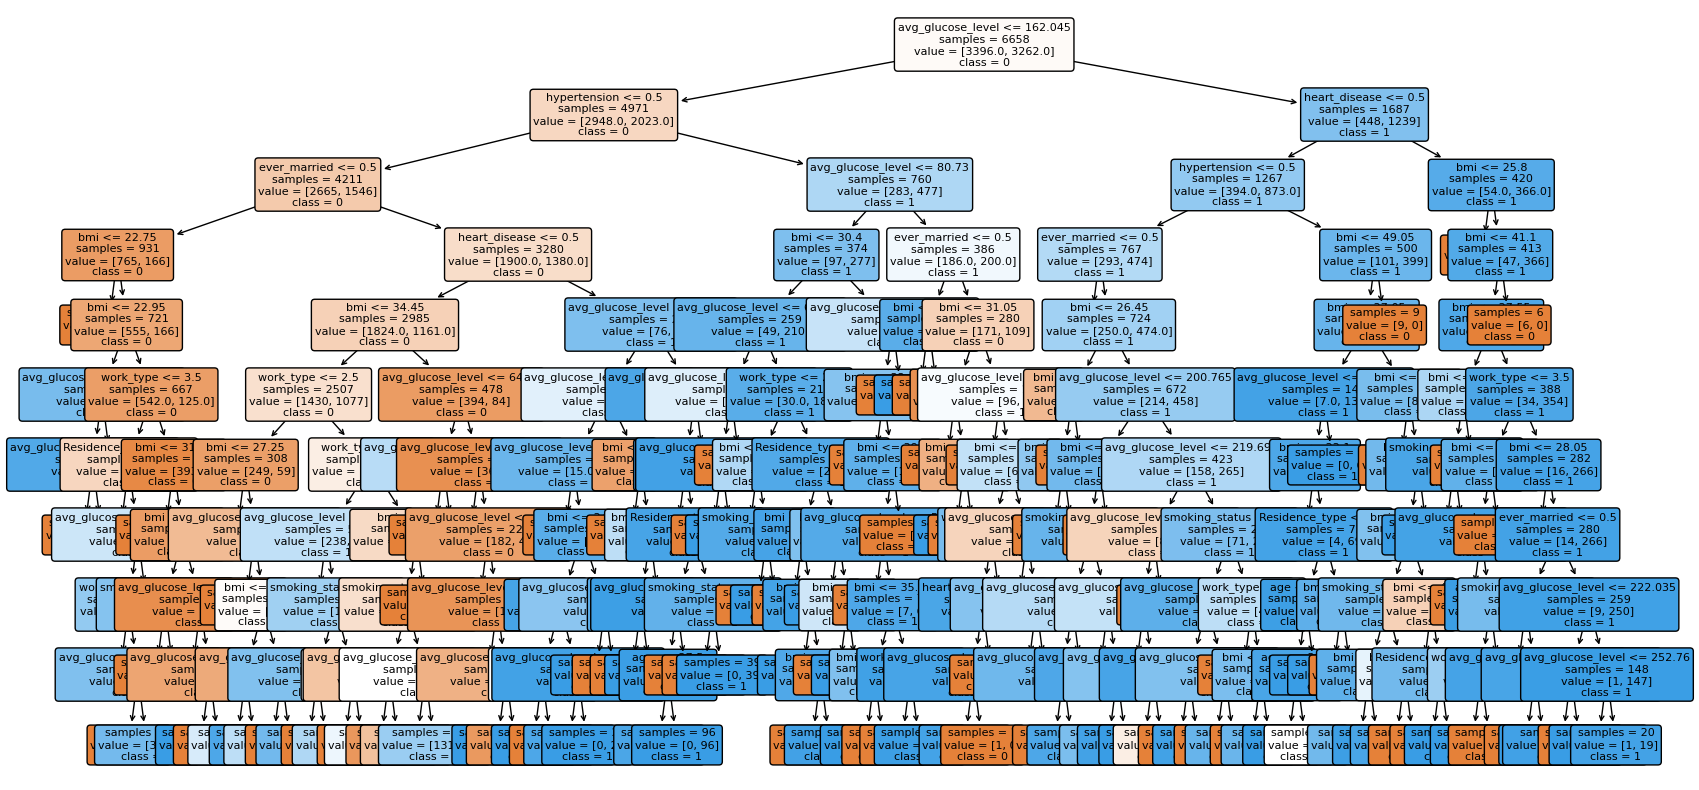

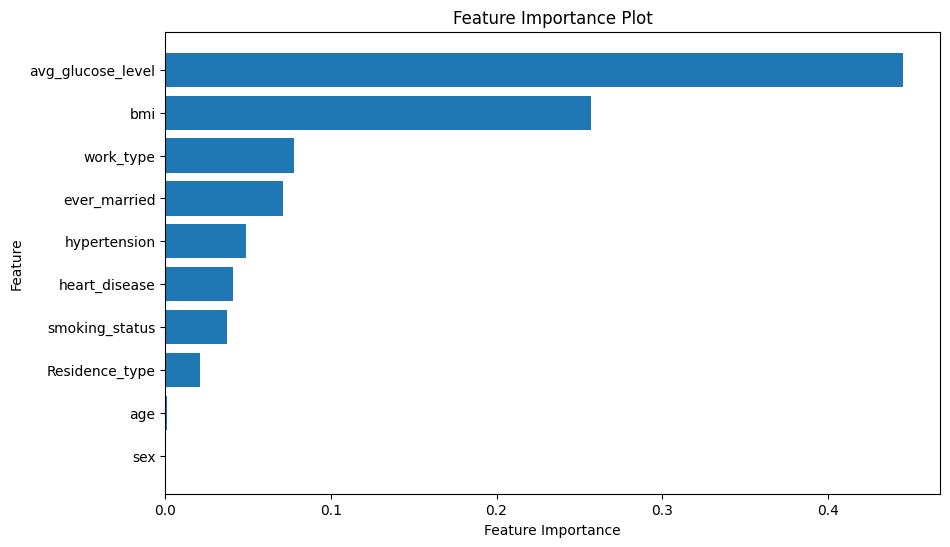

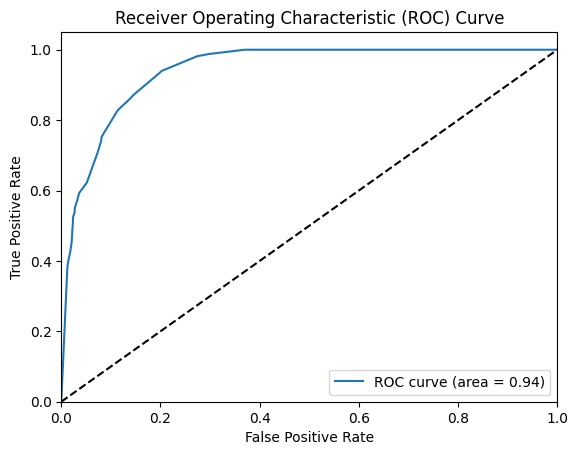

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9420153300398353
Accuracy for each fold: [0.8356643356643356, 0.8181818181818182, 0.7832167832167832, 0.7762237762237763, 0.8, 0.8526315789473684, 0.8105263157894737, 0.7894736842105263, 0.8526315789473684, 0.8105263157894737]
Mean accuracy: 0.8129076186970924
95% confidence interval: (0.7934536245970718, 0.832361612797113)


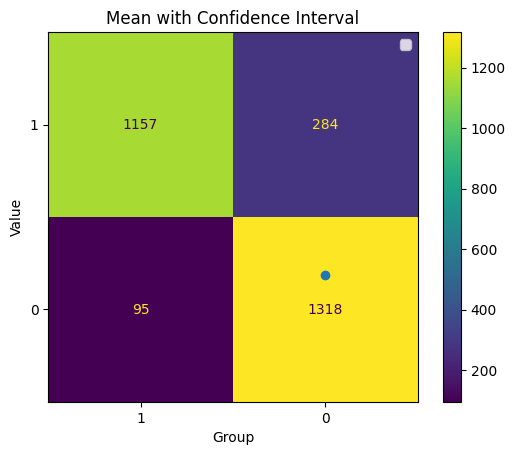


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



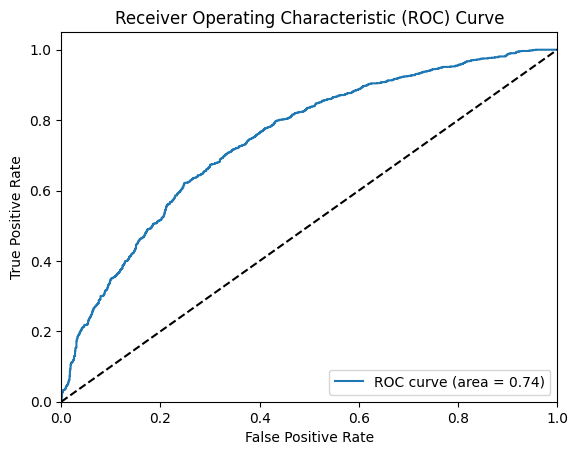

AUC Score: 0.7449041884788469


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6048951048951049, 0.7202797202797203, 0.6748251748251748, 0.6503496503496503, 0.6350877192982456, 0.6631578947368421, 0.6596491228070176, 0.6912280701754386, 0.6385964912280702, 0.6596491228070176]
Mean accuracy: 0.6597718071402283
95% confidence interval: (0.6370915818139731, 0.6824520324664836)


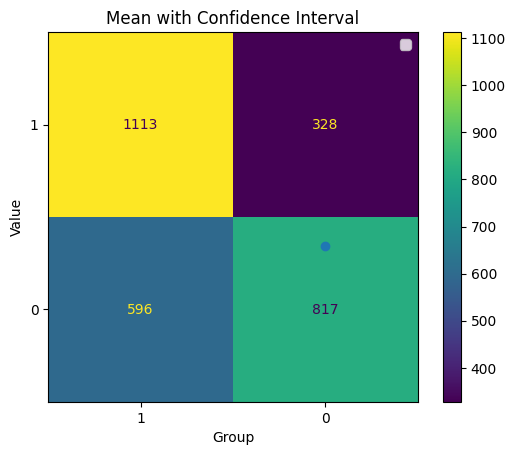


ORIGINAL VALUES RESTORED


In [3]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2526
Percentage of inconsistencies in age and married features: 26.56%
Number of inconsistencies in age and workType features: 2526
Percentage of inconsistencies in age and workType features: 26.56%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
53.111858704793946

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4756
Percentage of inconsistencies in age and married features: 50.00%
Number of inconsistencies in age and workType features: 4756
Percentage of inconsistencies in age and workType features: 50.00%
Number of abnormal values: 4756
Percentage of abnormal values: 50.00%

TOTAL INCONSISTENCY PERCENTAGE
150.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
       

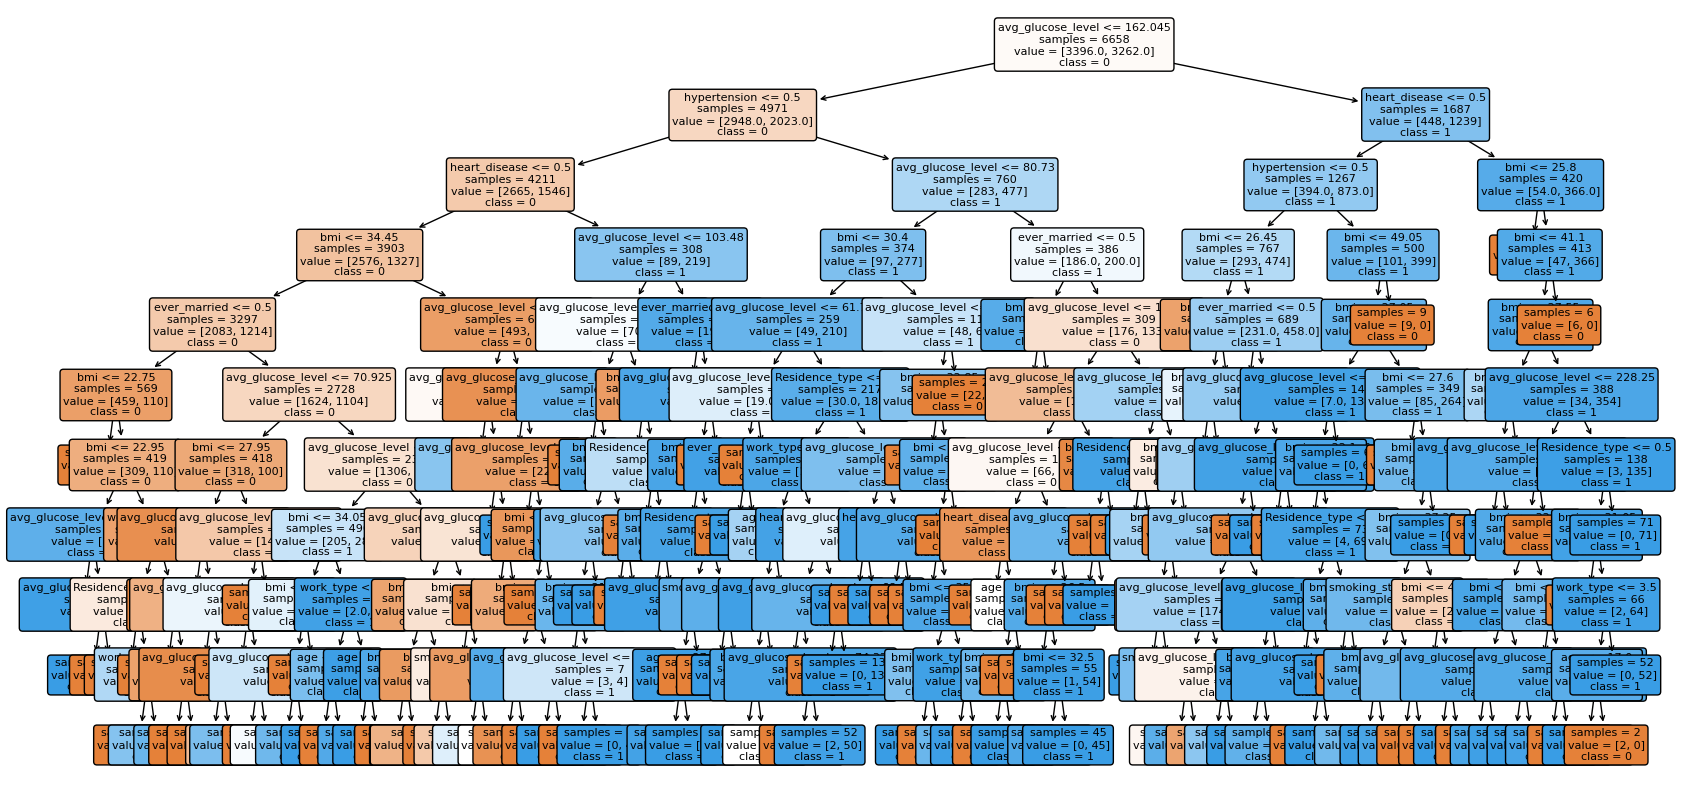

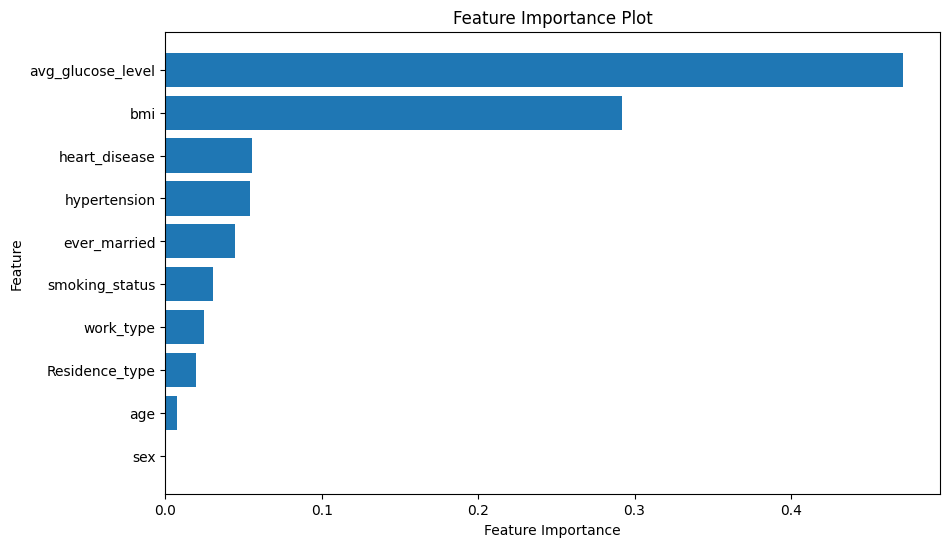

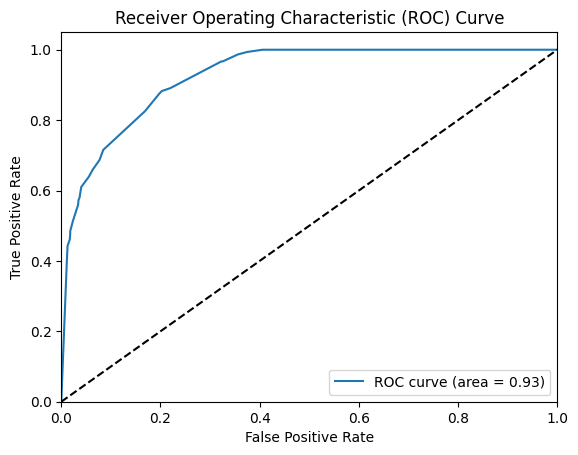

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9272324057416682
Accuracy for each fold: [0.8321678321678322, 0.8531468531468531, 0.8531468531468531, 0.8111888111888111, 0.8245614035087719, 0.8070175438596491, 0.8140350877192982, 0.775438596491228, 0.8, 0.7964912280701755]
Mean accuracy: 0.8167194209299472
95% confidence interval: (0.7990694226109555, 0.8343694192489389)


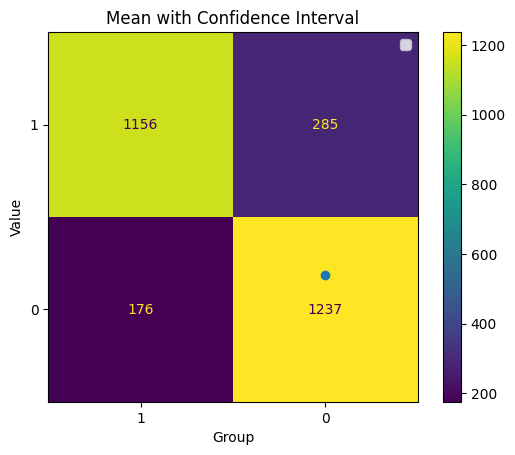


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



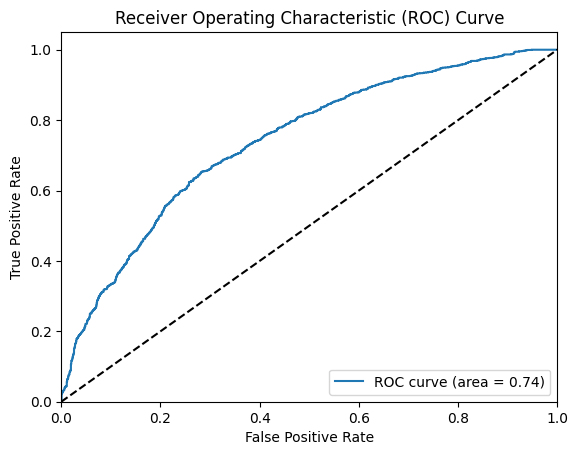

AUC Score: 0.7396795788880196


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6363636363636364, 0.6503496503496503, 0.6573426573426573, 0.6503496503496503, 0.6842105263157895, 0.6877192982456141, 0.6666666666666666, 0.6807017543859649, 0.6035087719298246, 0.6666666666666666]
Mean accuracy: 0.658387927861612
95% confidence interval: (0.6402448110539138, 0.6765310446693102)


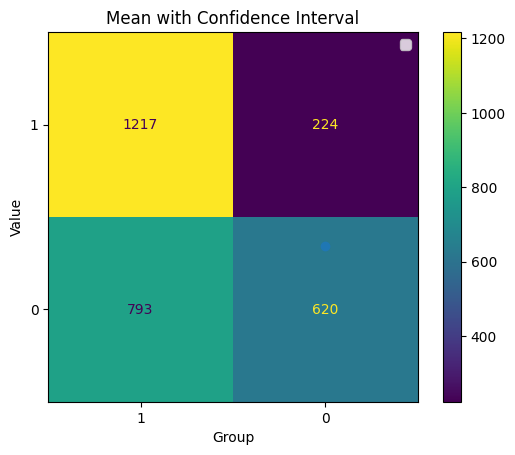


ORIGINAL VALUES RESTORED


In [4]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)  

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4223
Percentage of inconsistencies in age and married features: 44.40%
Number of inconsistencies in age and workType features: 4223
Percentage of inconsistencies in age and workType features: 44.40%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
88.79310344827587

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 9512
Percentage of inconsistencies in age and married features: 100.00%
Number of inconsistencies in age and workType features: 9512
Percentage of inconsistencies in age and workType features: 100.00%
Number of abnormal values: 9512
Percentage of abnormal values: 100.00%

TOTAL INCONSISTENCY PERCENTAGE
300.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
     

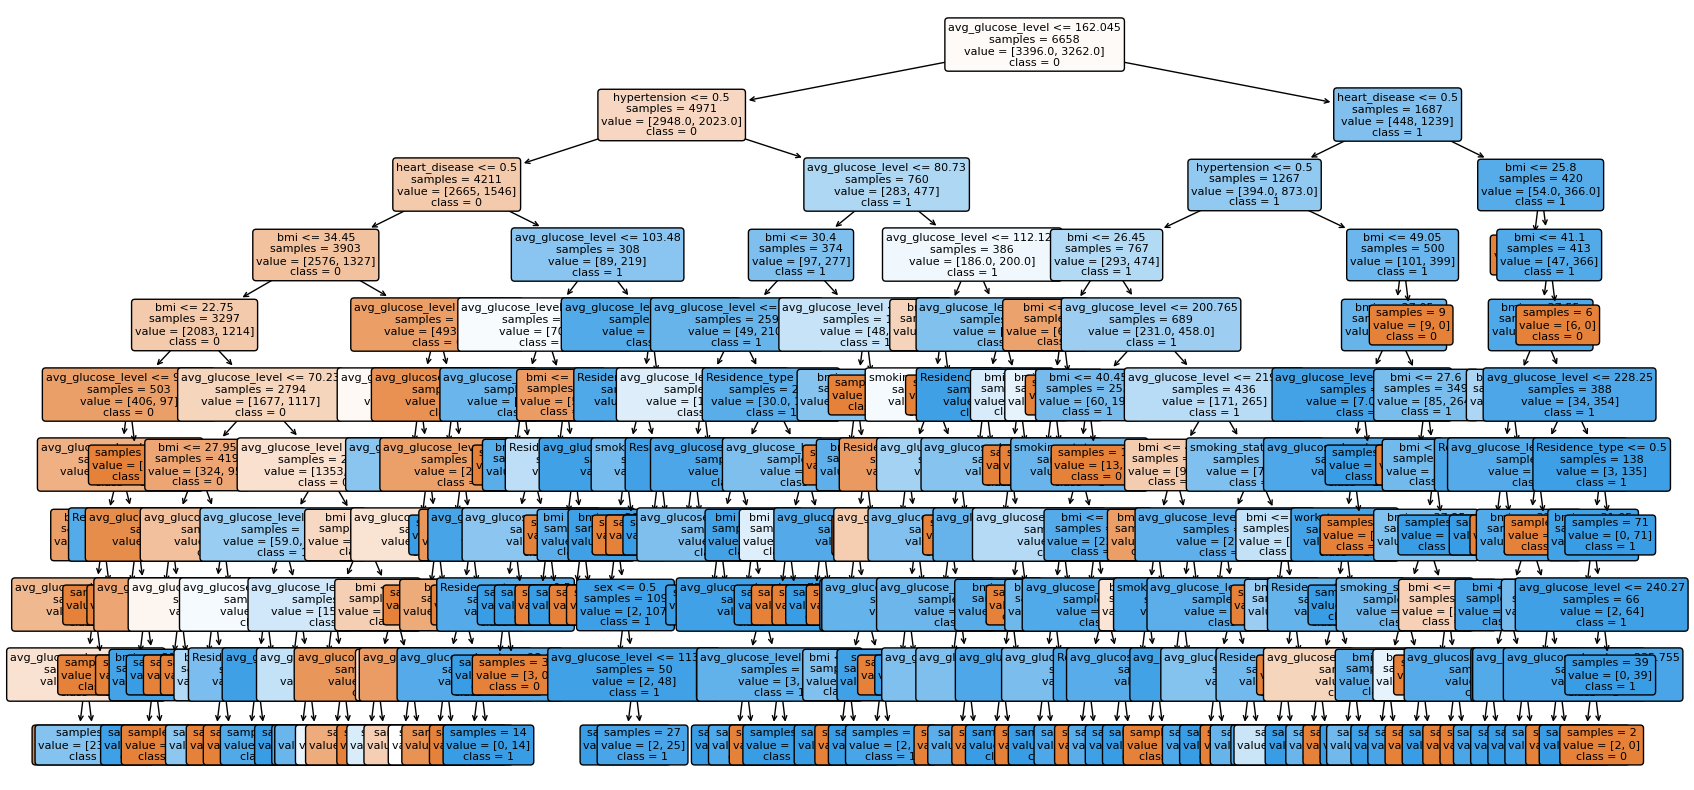

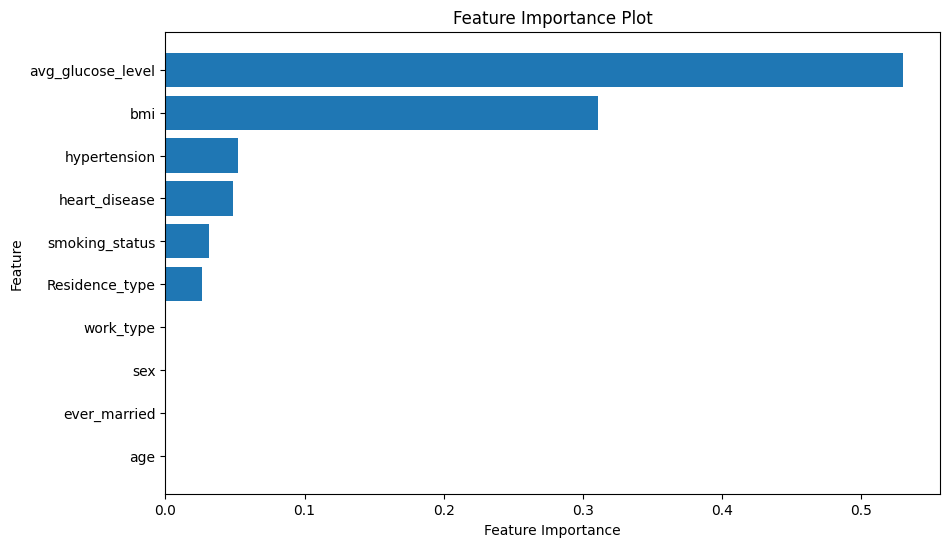

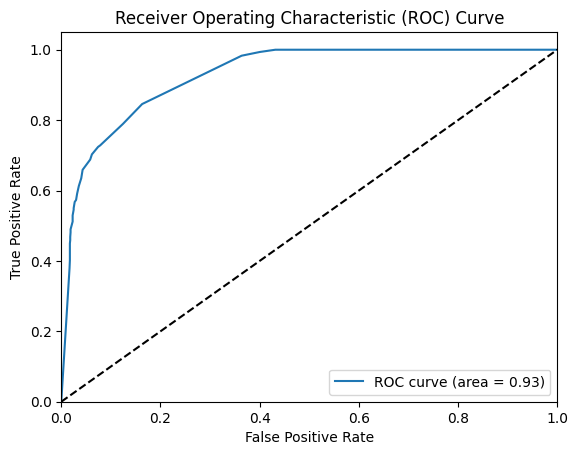

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9285093360797159
Accuracy for each fold: [0.7867132867132867, 0.8251748251748252, 0.7867132867132867, 0.8391608391608392, 0.8280701754385965, 0.8070175438596491, 0.8210526315789474, 0.8175438596491228, 0.8, 0.7859649122807018]
Mean accuracy: 0.8097411360569255
95% confidence interval: (0.7959259496758724, 0.8235563224379787)


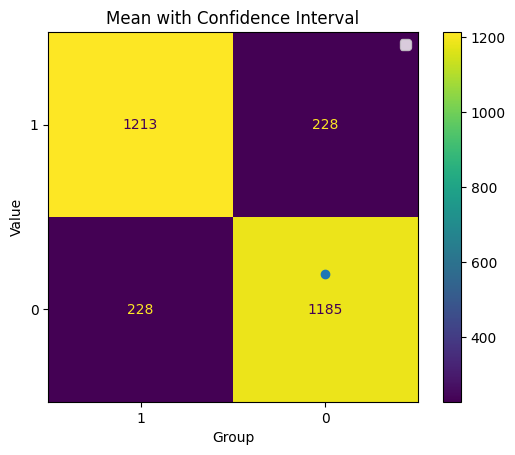


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------


ValueError: Found unknown categories [0, 1] in column 0 during transform

In [5]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features

In [ ]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 
